In [ ]:
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

A에서 G로의 변이가 있는 SNP의 유전자형(genotype)은 AA, AG, GG 세 그룹으로 나눌 수 있다.

In [ ]:
class CFG:
    SEED = 42

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(CFG.SEED) # Seed 고정

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
!unzip -qq "/content/gdrive/MyDrive/유전체 정보 품종 분류 AI 경진대회.zip"

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
train

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TRAIN_000,0,0,0,2,G G,A G,A A,G A,C A,...,A A,G G,A A,G G,A G,A A,A A,A A,A A,B
1,TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,...,A A,G A,A A,A G,A A,G A,G G,A A,A A,C
2,TRAIN_002,0,0,0,2,G G,G G,A A,G A,C C,...,A A,G A,G A,A G,A A,A A,A A,A A,A A,B
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G G,A G,G G,G G,G G,A A,G G,A
4,TRAIN_004,0,0,0,2,G G,G G,C C,A A,C C,...,A A,A A,A A,G G,A A,A A,A G,A A,G A,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,TRAIN_257,0,0,0,2,A G,A G,A A,G A,C C,...,A A,G A,A A,G G,A G,G A,A A,A A,A A,B
258,TRAIN_258,0,0,0,2,G G,A A,C A,A A,A A,...,G A,G A,A A,A G,A G,A A,A G,A A,G A,C
259,TRAIN_259,0,0,0,1,A G,G G,A A,G A,A A,...,G G,G A,G A,A A,G G,G G,G G,C A,G G,A
260,TRAIN_260,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G A,A G,A G,G A,G G,C A,G G,A


In [ ]:
print(train.select_dtypes(exclude=['object']).columns)

Index(['father', 'mother', 'gender', 'trait'], dtype='object')


수치형 데이터 Index(['father', 'mother', 'gender', 'trait'],

In [ ]:
print(train.select_dtypes(include=['object']).columns)

Index(['id', 'SNP_01', 'SNP_02', 'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06',
       'SNP_07', 'SNP_08', 'SNP_09', 'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13',
       'SNP_14', 'SNP_15', 'class'],
      dtype='object')


범주형 데이터 Index(['id', 'SNP_01', 'SNP_02', 'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06',
       'SNP_07', 'SNP_08', 'SNP_09', 'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13',
       'SNP_14', 'SNP_15', 'class'],
      dtype='object')

#train eda

In [ ]:
def identify_count(df, col):

  print(df[col].unique())

  print(df[col].value_counts())

  sns.countplot(data=df, x=col)
  plt.show()

[0]
0    262
Name: father, dtype: int64


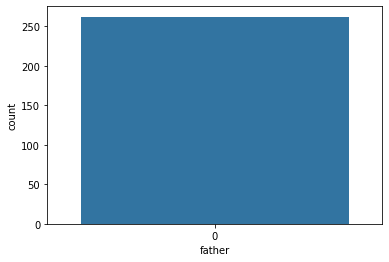

In [ ]:
identify_count(train, 'father')

[0]
0    262
Name: mother, dtype: int64


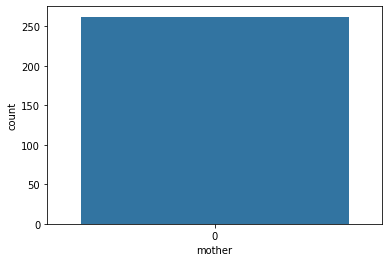

In [ ]:
identify_count(train, 'mother')

[0]
0    262
Name: gender, dtype: int64


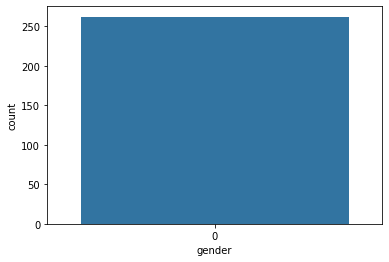

In [ ]:
identify_count(train, 'gender')

father,mother, gender는 삭제하자.

[2 1]
2    193
1     69
Name: trait, dtype: int64


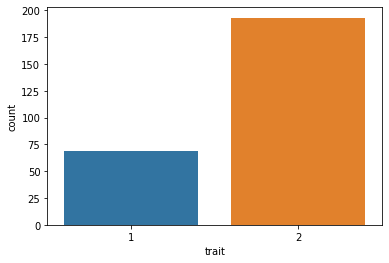

In [ ]:
identify_count(train, 'trait')

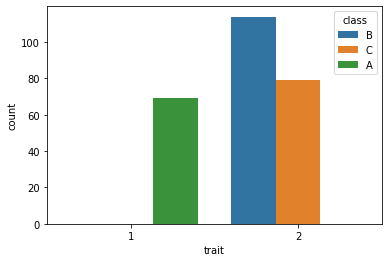

In [ ]:
sns.countplot(x='trait', data=train,hue = 'class')

['G G' 'A G' 'A A']
G G    141
A G     71
A A     50
Name: SNP_01, dtype: int64


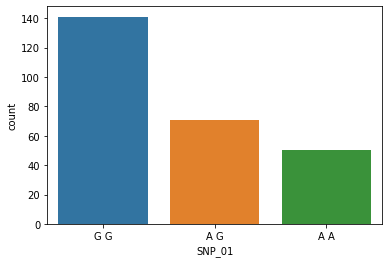

In [ ]:
identify_count(train, 'SNP_01')

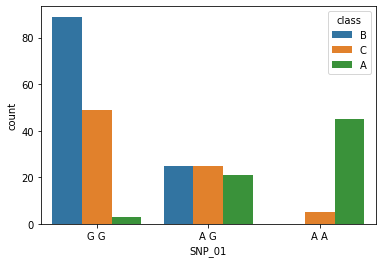

In [ ]:
sns.countplot(x='SNP_01', data=train,hue = 'class')

['A G' 'G G' 'A A']
G G    108
A G     97
A A     57
Name: SNP_02, dtype: int64


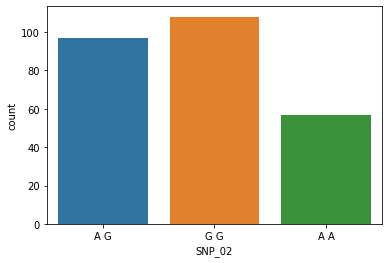

In [ ]:
identify_count(train, 'SNP_02')

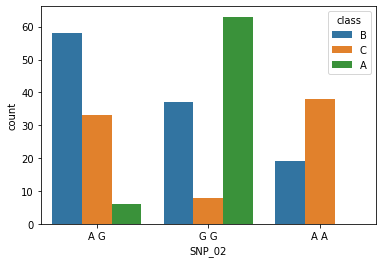

In [ ]:
sns.countplot(x='SNP_02', data=train,hue = 'class')

['A A' 'C A' 'C C']
A A    122
C A     92
C C     48
Name: SNP_03, dtype: int64


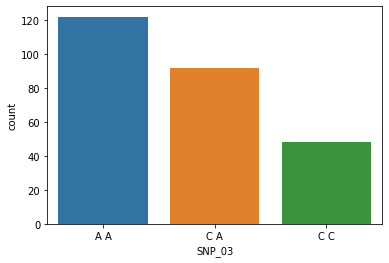

In [ ]:
identify_count(train, 'SNP_03')

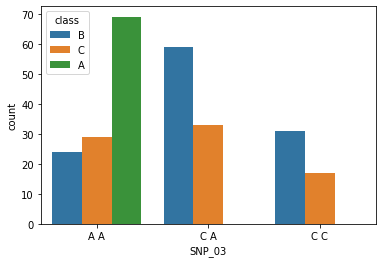

In [ ]:
sns.countplot(x='SNP_03', data=train,hue = 'class')

['G A' 'A A' 'G G']
A A    120
G A     93
G G     49
Name: SNP_04, dtype: int64


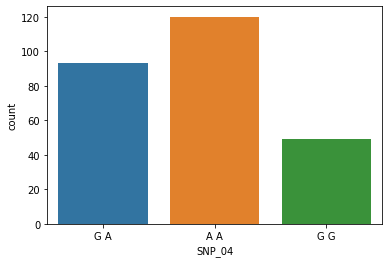

In [ ]:
identify_count(train, 'SNP_04')

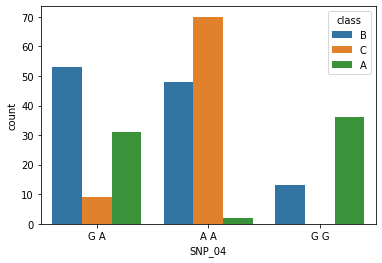

In [ ]:
sns.countplot(x='SNP_04', data=train,hue = 'class')

['C A' 'A A' 'C C']
A A    94
C A    86
C C    82
Name: SNP_05, dtype: int64


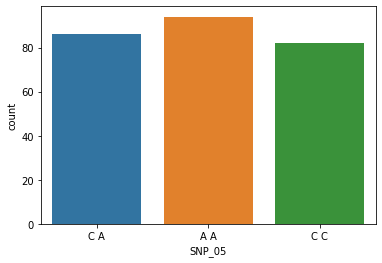

In [ ]:
identify_count(train, 'SNP_05')

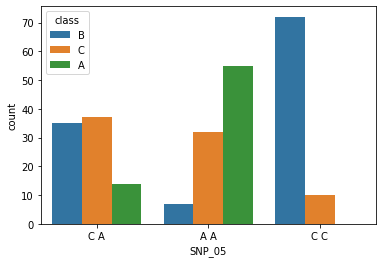

In [ ]:
sns.countplot(x='SNP_05', data=train,hue = 'class')

['A A' 'A G' 'G G']
A G    122
G G     79
A A     61
Name: SNP_06, dtype: int64


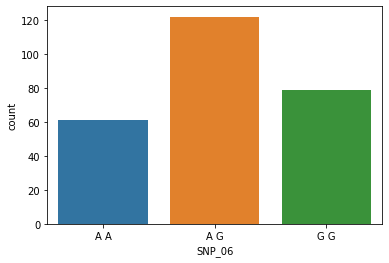

In [ ]:
identify_count(train, 'SNP_06')

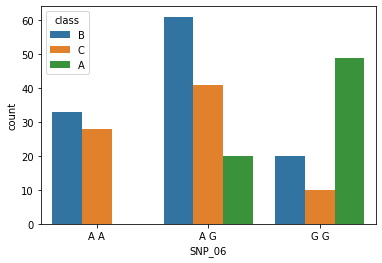

In [ ]:
sns.countplot(x='SNP_06', data=train,hue = 'class')

['A A' 'G G' 'G A']
A A    163
G G     51
G A     48
Name: SNP_07, dtype: int64


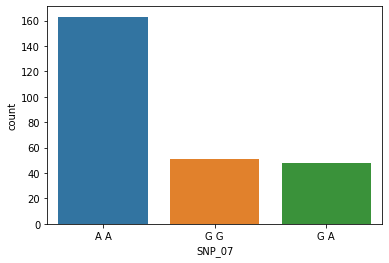

In [ ]:
identify_count(train, 'SNP_07')

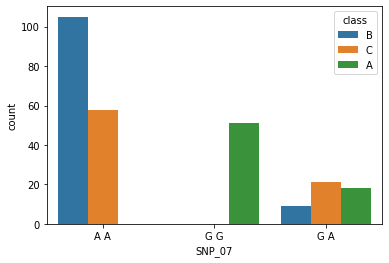

In [ ]:
sns.countplot(x='SNP_07', data=train,hue = 'class')

['G G' 'G A' 'A A']
G A    96
A A    87
G G    79
Name: SNP_08, dtype: int64


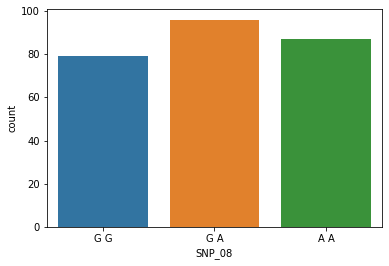

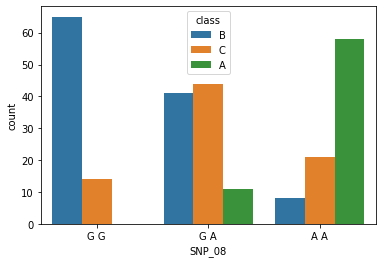

In [ ]:
identify_count(train, 'SNP_08')
sns.countplot(x='SNP_08', data=train,hue = 'class')

['A A' 'G A' 'G G']
A A    182
G A     56
G G     24
Name: SNP_09, dtype: int64


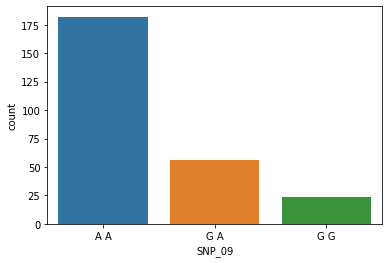

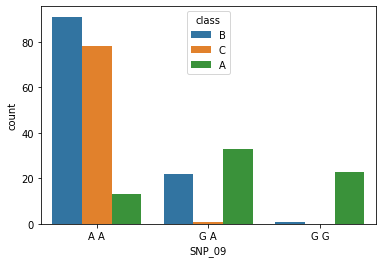

In [ ]:
identify_count(train, 'SNP_09')
sns.countplot(x='SNP_09', data=train,hue = 'class')

['G G' 'A G' 'A A']
G G    151
A G     68
A A     43
Name: SNP_10, dtype: int64


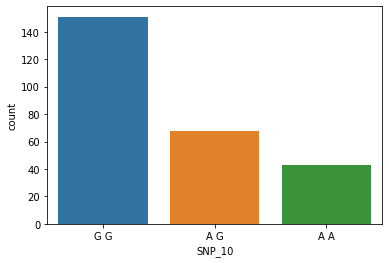

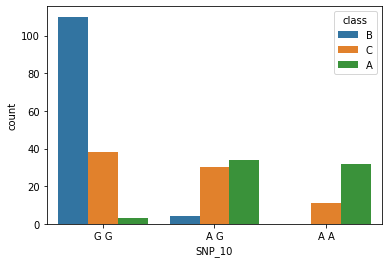

In [ ]:
identify_count(train, 'SNP_10')
sns.countplot(x='SNP_10', data=train,hue = 'class')

['A G' 'A A' 'G G']
A G    96
A A    83
G G    83
Name: SNP_11, dtype: int64


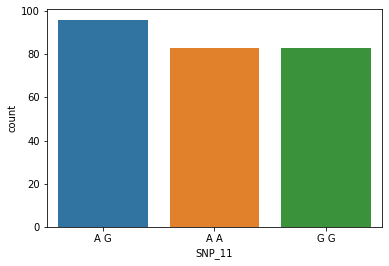

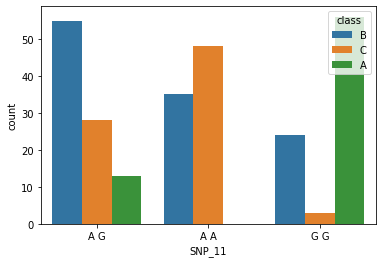

In [ ]:
identify_count(train, 'SNP_11')
sns.countplot(x='SNP_11', data=train,hue = 'class')

['A A' 'G A' 'G G']
A A    136
G A     73
G G     53
Name: SNP_12, dtype: int64


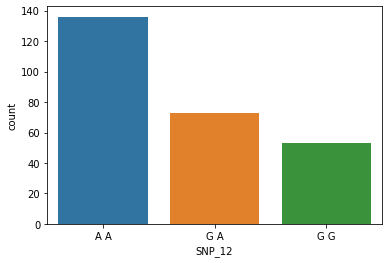

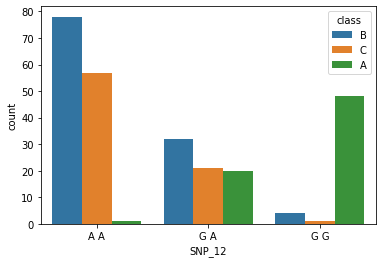

In [ ]:
identify_count(train, 'SNP_12')
sns.countplot(x='SNP_12', data=train,hue = 'class')

['A A' 'G G' 'A G']
G G    115
A G     95
A A     52
Name: SNP_13, dtype: int64


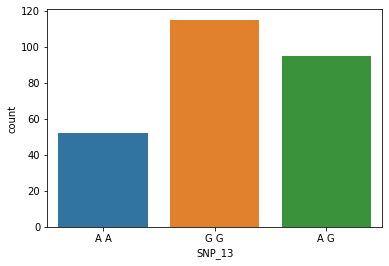

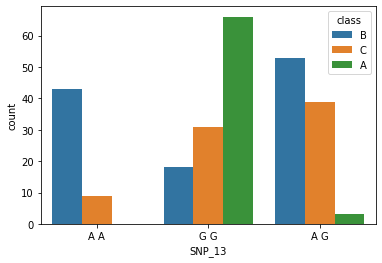

In [ ]:
identify_count(train, 'SNP_13')
sns.countplot(x='SNP_13', data=train,hue = 'class')

['A A' 'C C' 'C A']
A A    185
C A     54
C C     23
Name: SNP_14, dtype: int64


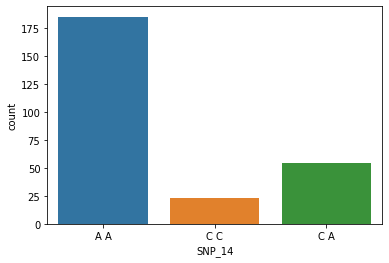

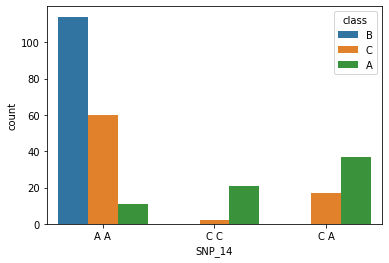

In [ ]:
identify_count(train, 'SNP_14')
sns.countplot(x='SNP_14', data=train,hue = 'class')

['A A' 'G G' 'G A']
A A    107
G A    100
G G     55
Name: SNP_15, dtype: int64


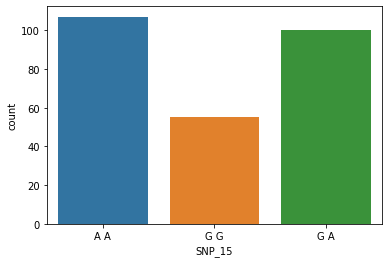

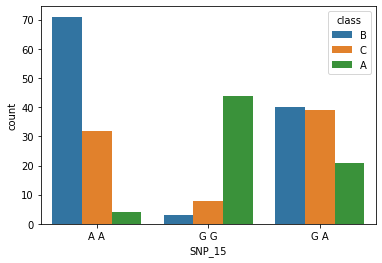

In [ ]:
identify_count(train, 'SNP_15')
sns.countplot(x='SNP_15', data=train,hue = 'class')

In [ ]:
train['SNP_15'].unique()

array(['A A', 'G G', 'G A'], dtype=object)

['B' 'C' 'A']
B    114
C     79
A     69
Name: class, dtype: int64


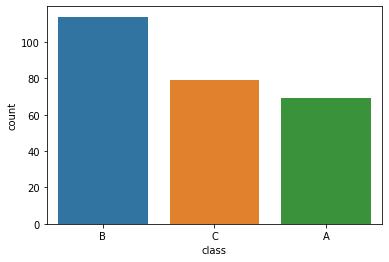

In [ ]:
identify_count(train, 'class')

In [ ]:
for i in train.columns:
  print(train[i].unique())

['TRAIN_000' 'TRAIN_001' 'TRAIN_002' 'TRAIN_003' 'TRAIN_004' 'TRAIN_005'
 'TRAIN_006' 'TRAIN_007' 'TRAIN_008' 'TRAIN_009' 'TRAIN_010' 'TRAIN_011'
 'TRAIN_012' 'TRAIN_013' 'TRAIN_014' 'TRAIN_015' 'TRAIN_016' 'TRAIN_017'
 'TRAIN_018' 'TRAIN_019' 'TRAIN_020' 'TRAIN_021' 'TRAIN_022' 'TRAIN_023'
 'TRAIN_024' 'TRAIN_025' 'TRAIN_026' 'TRAIN_027' 'TRAIN_028' 'TRAIN_029'
 'TRAIN_030' 'TRAIN_031' 'TRAIN_032' 'TRAIN_033' 'TRAIN_034' 'TRAIN_035'
 'TRAIN_036' 'TRAIN_037' 'TRAIN_038' 'TRAIN_039' 'TRAIN_040' 'TRAIN_041'
 'TRAIN_042' 'TRAIN_043' 'TRAIN_044' 'TRAIN_045' 'TRAIN_046' 'TRAIN_047'
 'TRAIN_048' 'TRAIN_049' 'TRAIN_050' 'TRAIN_051' 'TRAIN_052' 'TRAIN_053'
 'TRAIN_054' 'TRAIN_055' 'TRAIN_056' 'TRAIN_057' 'TRAIN_058' 'TRAIN_059'
 'TRAIN_060' 'TRAIN_061' 'TRAIN_062' 'TRAIN_063' 'TRAIN_064' 'TRAIN_065'
 'TRAIN_066' 'TRAIN_067' 'TRAIN_068' 'TRAIN_069' 'TRAIN_070' 'TRAIN_071'
 'TRAIN_072' 'TRAIN_073' 'TRAIN_074' 'TRAIN_075' 'TRAIN_076' 'TRAIN_077'
 'TRAIN_078' 'TRAIN_079' 'TRAIN_080' 'TRAIN_081' 'T

#test eda

In [ ]:
train

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TRAIN_000,0,0,0,2,G G,A G,A A,G A,C A,...,A A,G G,A A,G G,A G,A A,A A,A A,A A,B
1,TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,...,A A,G A,A A,A G,A A,G A,G G,A A,A A,C
2,TRAIN_002,0,0,0,2,G G,G G,A A,G A,C C,...,A A,G A,G A,A G,A A,A A,A A,A A,A A,B
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G G,A G,G G,G G,G G,A A,G G,A
4,TRAIN_004,0,0,0,2,G G,G G,C C,A A,C C,...,A A,A A,A A,G G,A A,A A,A G,A A,G A,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,TRAIN_257,0,0,0,2,A G,A G,A A,G A,C C,...,A A,G A,A A,G G,A G,G A,A A,A A,A A,B
258,TRAIN_258,0,0,0,2,G G,A A,C A,A A,A A,...,G A,G A,A A,A G,A G,A A,A G,A A,G A,C
259,TRAIN_259,0,0,0,1,A G,G G,A A,G A,A A,...,G G,G A,G A,A A,G G,G G,G G,C A,G G,A
260,TRAIN_260,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G A,A G,A G,G A,G G,C A,G G,A


In [ ]:
test

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,TEST_000,0,0,0,1,A G,G G,A A,G A,A A,A G,G G,G A,G A,A G,A G,G A,G G,C A,G A
1,TEST_001,0,0,0,2,G G,A G,C C,G G,C C,A A,A A,A A,A A,G G,A G,A A,A A,A A,A A
2,TEST_002,0,0,0,2,G G,A G,A A,A A,C A,A G,A A,A A,A A,A G,A A,G A,G G,A A,G G
3,TEST_003,0,0,0,2,G G,A G,C A,A A,C C,A A,A A,A A,A A,G G,A A,G A,A G,A A,A A
4,TEST_004,0,0,0,1,A A,G G,A A,G G,A A,G G,G G,A A,G G,A G,G G,G A,G G,A A,G G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,TEST_170,0,0,0,2,A G,G G,C C,A A,C A,A G,A A,G G,A A,G G,G G,A A,A A,A A,G A
171,TEST_171,0,0,0,2,G G,A A,A A,A A,C A,A G,A A,A A,A A,A G,A A,A A,A G,A A,G A
172,TEST_172,0,0,0,2,G G,A A,A A,A A,C A,A G,A A,A A,A A,G G,A G,A A,A G,A A,G G
173,TEST_173,0,0,0,2,A G,G G,C A,G A,C C,G G,A A,G A,A A,G G,A G,A A,A A,A A,A A


딱히 빠진 컬럼이나 그런건 안보인다.

# 결론!

father, mother, gender를 삭제해야 한다.

각 snp에는

['G G' 'A G' 'A A']

['A G' 'G G' 'A A']

['A A' 'C A' 'C C']

['G A' 'A A' 'G G']


['C A' 'A A' 'C C']

['A A' 'A G' 'G G']

['A A' 'G G' 'G A']

['G G' 'G A' 'A A']

['A A' 'G A' 'G G']

['G G' 'A G' 'A A']

['A G' 'A A' 'G G']

['A A' 'G A' 'G G']

['A A' 'G G' 'A G']

['A A' 'C C' 'C A']

['A A' 'G G' 'G A']

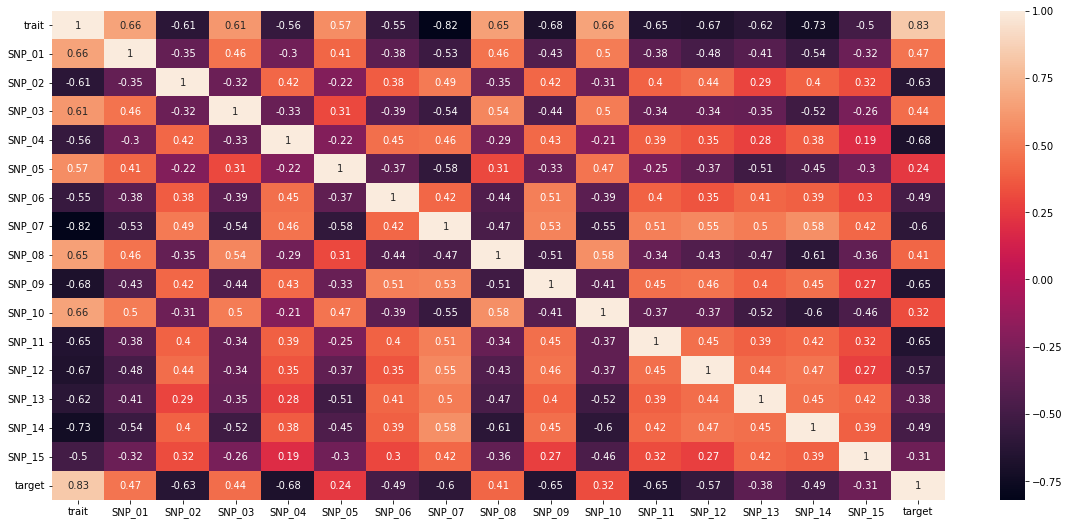

# 가설

1. target과 trait,snp_01,03,05,08,10과 가장 연관이 깊다.

['G G' 'A G' 'A A']
G G    141
A G     71
A A     50
Name: SNP_01, dtype: int64


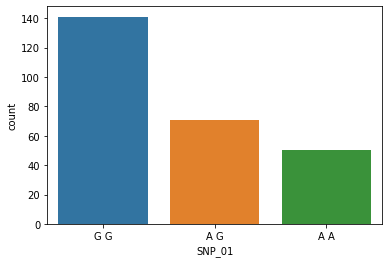

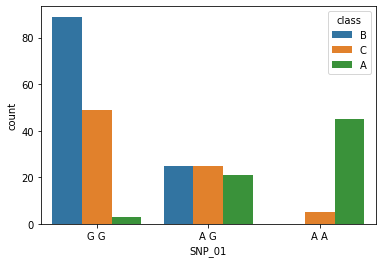

In [ ]:
identify_count(train, 'SNP_01')
sns.countplot(x='SNP_01', data=train,hue = 'class')

['A A' 'C A' 'C C']
A A    122
C A     92
C C     48
Name: SNP_03, dtype: int64


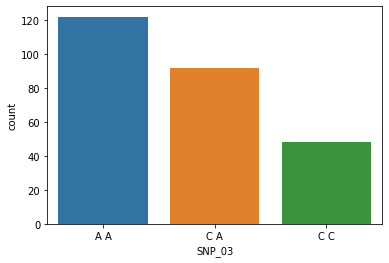

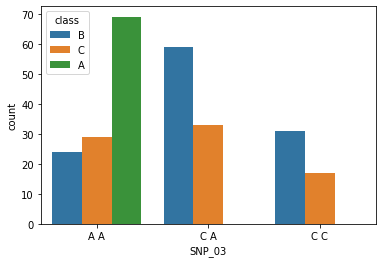

In [ ]:
identify_count(train, 'SNP_03')
sns.countplot(x='SNP_03', data=train,hue = 'class')

['C A' 'A A' 'C C']
A A    94
C A    86
C C    82
Name: SNP_05, dtype: int64


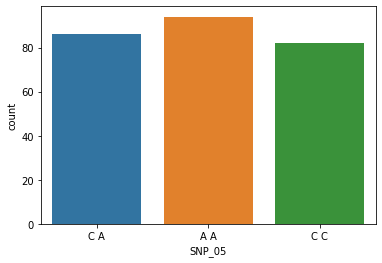

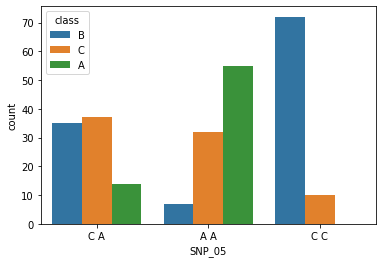

In [ ]:
identify_count(train, 'SNP_05')
sns.countplot(x='SNP_05', data=train,hue = 'class')

['G G' 'G A' 'A A']
G A    96
A A    87
G G    79
Name: SNP_08, dtype: int64


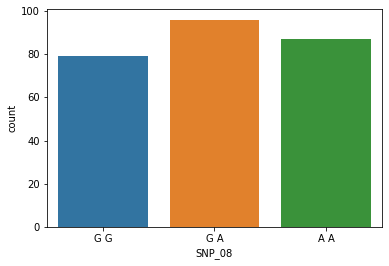

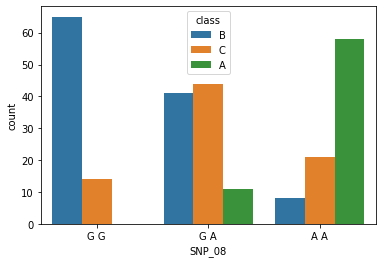

In [ ]:
identify_count(train, 'SNP_08')
sns.countplot(x='SNP_08', data=train,hue = 'class')

['G G' 'A G' 'A A']
G G    151
A G     68
A A     43
Name: SNP_10, dtype: int64


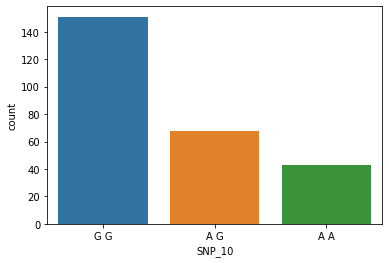

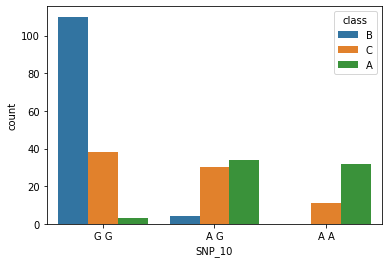

In [ ]:
identify_count(train, 'SNP_10')
sns.countplot(x='SNP_10', data=train,hue = 'class')

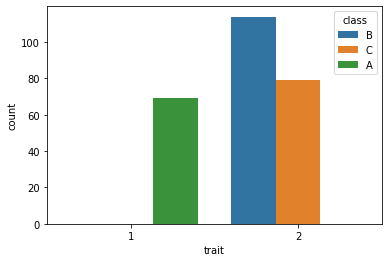

In [ ]:
sns.countplot(x='trait', data=train,hue = 'class')